In [1]:
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
df =pd.read_csv("Maternal Health Risk Data Set_1.csv")

In [3]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,NaN,high risk
1,35,140,90,13.0,100.0,70.0,high risk
2,29,90,70,8.0,98.0,80.0,high risk
3,30,140,130,7.0,98.0,70.0,high risk
4,35,120,60,6.1,98.0,76.0,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80.0,high risk
1010,55,120,90,18.0,98.0,60.0,high risk
1011,35,85,60,19.0,98.0,86.0,high risk
1012,43,120,90,NaN,98.0,NaN,high risk


# VERİ SETİ HİKAYESİ

**Anne Sağlığı Riski**

Nesnelerin interneti(IoT) tabanlı risk izleme sistemi aracılığıyla Bangladeş'in kırsal alanlarından farklı hastanelerden, toplum kliniklerinden, anne sağlığı hizmetlerinden Anne Sağlığı Risk Faktörü verileri toplanmıştır.

* **Age**: Hamile kadının yaşı.

* **SystolicBP** (Sistolik Kan Basıncı): mmHg (milimetre civa) cinsinden kalbin kasılması sırasında ulaşılan en yüksek kan basıncı.Büyük tansiyon.

* **DiastolicBP** (Diyastolik Kan Basıncı): mmHg (milimetre civa) cinsinden kalp gevşediğinde hâlâ damar duvarında mevcut olan kan basıncı. Küçük tansiyon.

* **BS**: Kan şekeri değeri.Seviyeleri molar konsantrasyon cinsindendir. (mmol/L)

* **BodyTemp**: Hamile kadının Fahrenheit (°F) cinsinden vücut sıcaklığı ölçüsü.

* **HeartRate**: Normal bir dinlenme halinde kalp atış hızı. (bpm)

* **RiskLevel**: Önceki özellikler dikkate alınarak hamilelik sırasında Öngörülen Risk Yoğunluğu Seviyesi. (high  risk, mid risk, low risk)







In [4]:
df.shape

(1014, 7)

In [5]:
unique_values = df['RiskLevel'].unique()

In [6]:
df['RiskLevel'] = df['RiskLevel'].astype('category')

In [7]:
df.info() #veri setinin tüm yapısal özellikleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1014 non-null   int64   
 1   SystolicBP   1014 non-null   int64   
 2   DiastolicBP  1014 non-null   int64   
 3   BS           966 non-null    float64 
 4   BodyTemp     1014 non-null   float64 
 5   HeartRate    971 non-null    float64 
 6   RiskLevel    1014 non-null   category
dtypes: category(1), float64(3), int64(3)
memory usage: 48.8 KB


In [8]:
df.describe().T #sürekli(sayısal) değişkenlerin betimsel özellikleri

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.735700,13.315118,10.0,19.0,25.0,37.75,66.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.00,160.0
DiastolicBP,1014.0,76.514793,14.633842,20.0,65.0,80.0,90.00,140.0
BS,966.0,8.766677,3.336021,6.0,6.9,7.5,8.00,19.0
BodyTemp,1014.0,98.761736,1.390035,97.0,98.0,98.0,99.00,105.0
HeartRate,971.0,74.317199,8.209016,7.0,70.0,76.0,80.00,100.0


In [9]:
kat_df = df.select_dtypes(include = ["category"]) #dataframe içerisinden categorye göre değişken seçtik

In [10]:
kat_df

,RiskLevel
0,high risk
1,high risk
2,high risk
3,high risk
4,low risk
...,...
1009,high risk
1010,high risk
1011,high risk
1012,high risk


In [11]:
df["RiskLevel"].value_counts().index

CategoricalIndex(['low risk', 'mid risk', 'high risk'], categories=['high risk', 'low risk', 'mid risk'], ordered=False, dtype='category', name='RiskLevel')

In [12]:
df["RiskLevel"].value_counts() 

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [13]:
from pandas.api.types import CategoricalDtype
riskLevel_kategoriler = ["high risk","mid risk","low risk"] #kategorik değişkenleri sıraladık
df.RiskLevel = df.RiskLevel.astype(CategoricalDtype(categories = riskLevel_kategoriler, ordered = True))

In [14]:
df["RiskLevel"].value_counts().index

CategoricalIndex(['low risk', 'mid risk', 'high risk'], categories=['high risk', 'mid risk', 'low risk'], ordered=True, dtype='category', name='RiskLevel')

In [15]:
df.isnull().values.any() 

True

In [16]:
df.isnull().sum()

Age             0
SystolicBP      0
DiastolicBP     0
BS             48
BodyTemp        0
HeartRate      43
RiskLevel       0
dtype: int64

Risk seviyesinin yaş arttıkça arttığı gözükmektedir.Hamilelik riskinin 28 yaşında orta riskli,28 yaşın altında düşük,üstünde yüksek riskli gebelikler görülmektedir.

<Axes: xlabel='RiskLevel', ylabel='Age'>

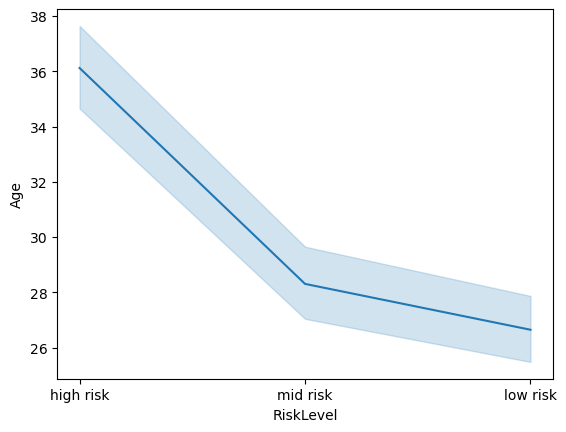

In [17]:
sns.lineplot(x = "RiskLevel", y = "Age", data = df) #ÇİZGİ GRAFİĞİ

Düşük ve orta riskli gebeliklerde büyük ve küçük tansiyonun daha düşük olduğu genellikle büyük tansiyon için 80-100 küçük tansiyon için 40-60 aralığında olduğu,tansiyon değerlerinin arttıkça gebelik riskininde arttığı gözükmektedir.Yüksek riskli gebeliklerde büyük tansiyon genellikle 120 ve üst değerlere çıkmıştır.

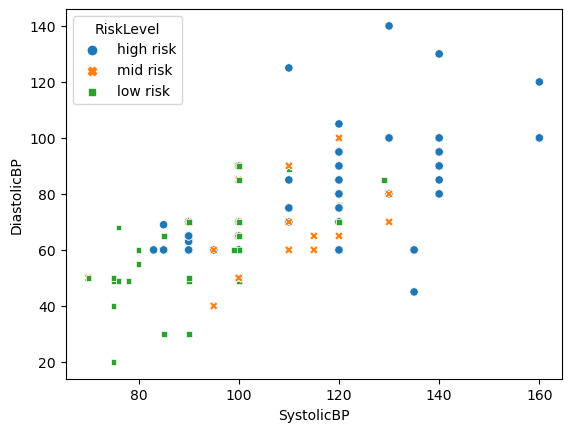

In [18]:
sns.scatterplot(x = "SystolicBP", y = "DiastolicBP", hue = "RiskLevel",style = "RiskLevel", data = df);#Korelasyon Grafikleri

98°F vücut sıcaklığında olan hastaların çoğunluğunun düşük riskli gebe olduğunu,genellikle yüksek ya da orta riskli gebelerde vücut sıcaklığının 
yükseldiğini söyleyebiliriz.

C:\Users\iirem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


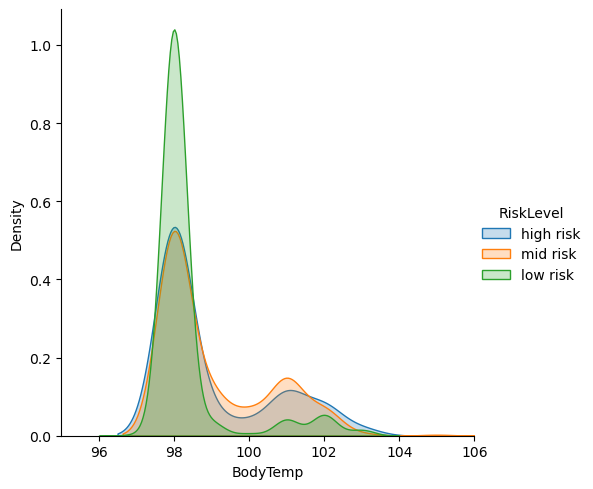

In [19]:
(sns
 .FacetGrid(df,
              hue = "RiskLevel",
              height = 5,
              xlim = (95, 106)) # x ekseni 95 ile 106 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "BodyTemp", fill= True)  
 .add_legend()
);

**Aykırı Değer Analizi**

In [20]:
df2= df.select_dtypes(include = ['float64', 'int64']) #sadece sayısal değişkenlere erişiyoruz

In [21]:
df2 = df2.dropna() #eksik değerleri görmezden geliyoruz

In [22]:
df2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
1,35,140,90,13.00,100.0,70.0
2,29,90,70,8.00,98.0,80.0
3,30,140,130,7.00,98.0,70.0
4,35,120,60,6.10,98.0,76.0
5,23,140,80,7.01,98.0,70.0
...,...,...,...,...,...,...
1008,48,120,80,11.00,98.0,88.0
1009,22,120,60,15.00,98.0,80.0
1010,55,120,90,18.00,98.0,60.0
1011,35,85,60,19.00,98.0,86.0


In [23]:
#Age

In [24]:
df_age = df2["Age"]
df_age.head()

1    35
2    29
3    30
4    35
5    23
Name: Age, dtype: int64

In [25]:
df_age

1       35
2       29
3       30
4       35
5       23
        ..
1008    48
1009    22
1010    55
1011    35
1013    32
Name: Age, Length: 928, dtype: int64

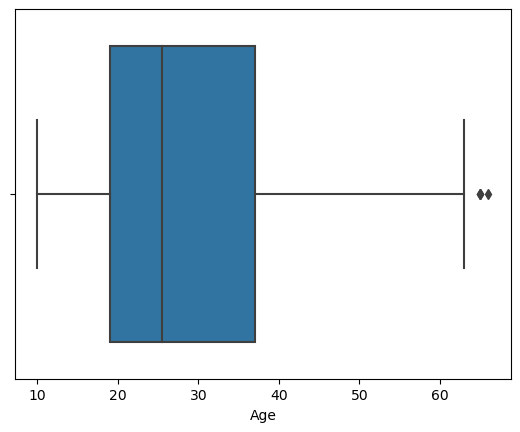

In [26]:
sns.boxplot(x = df_age); #Kutu grafiğin (bıyıkların) sağında ve solunda görülen noktalar aykırı gözlemdir

In [27]:
Q1 = df_age.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = df_age.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [28]:
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 19.0 
Q3= 37.0 
IQR= 18.0


In [29]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [30]:
print("Alt Sinir=",alt_sinir,"\nUst Sinir=",ust_sinir)

Alt Sinir= -8.0 
Ust Sinir= 64.0


In [31]:
(df_age < alt_sinir) | (df_age > ust_sinir)

1       False
2       False
3       False
4       False
5       False
        ...  
1008    False
1009    False
1010    False
1011    False
1013    False
Name: Age, Length: 928, dtype: bool

In [32]:
aykiri_tf = (df_age < alt_sinir) | (df_age > ust_sinir)

In [33]:
df_age[aykiri_tf].index

Index([322, 326, 435, 967], dtype='int64')

In [34]:
df_age[aykiri_tf]

322    65
326    66
435    65
967    65
Name: Age, dtype: int64

In [35]:
ortalama=df_age.mean()
ortalama_int = int(ortalama)

In [36]:
df_age[aykiri_tf] = ortalama_int #aykırı değerleri ortalama ile doldurduk

In [37]:
df_age[aykiri_tf]

322    29
326    29
435    29
967    29
Name: Age, dtype: int64

In [38]:
aykiri_indeksler = df_age[aykiri_tf].index

In [39]:
df.loc[aykiri_indeksler, "Age"] = df_age[aykiri_tf]

In [40]:
#SystolicBP

In [41]:
df_SystolicBP = df2["SystolicBP"]

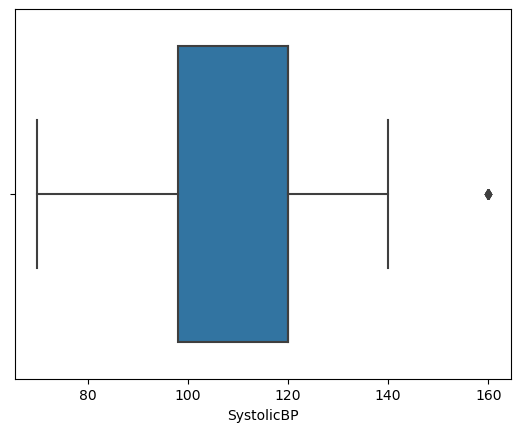

In [42]:
sns.boxplot(x = df_SystolicBP); 

In [43]:
df_SystolicBP2 = df_SystolicBP.sort_values()

In [44]:
Q1 = df_SystolicBP.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = df_SystolicBP.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [45]:
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 98.0 
Q3= 120.0 
IQR= 22.0


In [46]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [47]:
print("Alt Sinir=",alt_sinir,"\nUst Sinir=",ust_sinir)

Alt Sinir= 65.0 
Ust Sinir= 153.0


In [48]:
aykiri_tf = (df_SystolicBP < alt_sinir) | (df_SystolicBP > ust_sinir)

In [49]:
df_SystolicBP[aykiri_tf].index

Index([130, 166, 262, 362, 538, 583, 689, 961, 994], dtype='int64')

In [50]:
df_SystolicBP[aykiri_tf]

130    160
166    160
262    160
362    160
538    160
583    160
689    160
961    160
994    160
Name: SystolicBP, dtype: int64

In [51]:
alt_aykiri=(df_SystolicBP < alt_sinir)

In [52]:
df_SystolicBP[alt_aykiri]

Series([], Name: SystolicBP, dtype: int64)

In [53]:
df_SystolicBP[alt_aykiri] = alt_sinir

In [54]:
df_SystolicBP[alt_aykiri]

Series([], Name: SystolicBP, dtype: int64)

In [55]:
aykiri_indeksler_alt = df_SystolicBP[alt_aykiri].index

In [56]:
df.loc[aykiri_indeksler_alt, "SystolicBP"] = df_SystolicBP[alt_aykiri]

In [57]:
ust_aykiri=(df_SystolicBP > ust_sinir)

In [58]:
df_SystolicBP[ust_aykiri]

130    160
166    160
262    160
362    160
538    160
583    160
689    160
961    160
994    160
Name: SystolicBP, dtype: int64

In [59]:
df_SystolicBP[ust_aykiri] = ust_sinir

C:\Users\iirem\AppData\Local\Temp\ipykernel_18548\3706616656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SystolicBP[ust_aykiri] = ust_sinir


In [60]:
df_SystolicBP[ust_aykiri]

130    153
166    153
262    153
362    153
538    153
583    153
689    153
961    153
994    153
Name: SystolicBP, dtype: int64

In [61]:
aykiri_indeksler_ust =df_SystolicBP[ust_aykiri].index

In [62]:
df.loc[aykiri_indeksler_ust, "SystolicBP"] = df_SystolicBP[ust_aykiri]

In [63]:
#DiastolicBP

In [64]:
df_DiastolicBP = df2["DiastolicBP"]

In [65]:
df_DiastolicBP = df_DiastolicBP.sort_values()

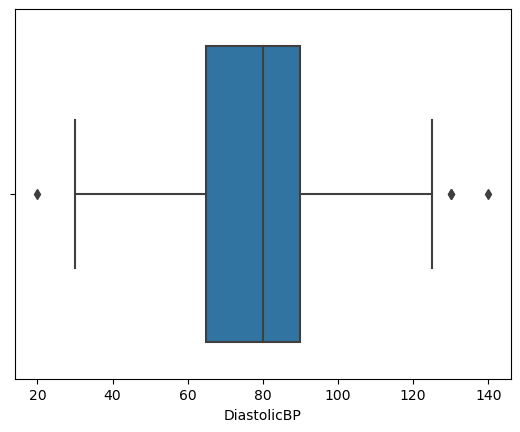

In [66]:
sns.boxplot(x = df_DiastolicBP); #Kutu grafiğin (bıyıkların) sağında ve solunda görülen noktalar aykırı gözlemdir

In [67]:
Q1 = df_DiastolicBP.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = df_DiastolicBP.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [68]:
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 65.0 
Q3= 90.0 
IQR= 25.0


In [69]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [70]:
print("Alt Sinir=",alt_sinir,"\nUst Sinir=",ust_sinir)

Alt Sinir= 27.5 
Ust Sinir= 127.5


In [71]:
aykiri_tf = (df_DiastolicBP < alt_sinir) | (df_DiastolicBP > ust_sinir)

In [72]:
df_DiastolicBP[aykiri_tf].index

Index([34, 981, 3, 138], dtype='int64')

In [73]:
df_DiastolicBP[aykiri_tf]

34      20
981    130
3      130
138    140
Name: DiastolicBP, dtype: int64

In [74]:
alt_aykiri=(df_DiastolicBP < alt_sinir)

In [75]:
df_DiastolicBP[alt_aykiri]

34    20
Name: DiastolicBP, dtype: int64

In [76]:
df_DiastolicBP[alt_aykiri] = int( alt_sinir)

In [77]:
df_DiastolicBP[alt_aykiri]

34    27
Name: DiastolicBP, dtype: int64

In [78]:
aykiri_indeksler_alt = df_DiastolicBP[alt_aykiri].index

In [79]:
df.loc[aykiri_indeksler_alt, "DiastolicBP"] = df_DiastolicBP[alt_aykiri]

In [80]:
ust_aykiri=(df_DiastolicBP > ust_sinir)

In [81]:
df_DiastolicBP[ust_aykiri]

981    130
3      130
138    140
Name: DiastolicBP, dtype: int64

In [82]:
df_DiastolicBP[ust_aykiri] = int(ust_sinir)

In [83]:
df_DiastolicBP[ust_aykiri]

981    127
3      127
138    127
Name: DiastolicBP, dtype: int64

In [84]:
aykiri_indeksler_ust =df_DiastolicBP[ust_aykiri].index

In [85]:
df.loc[aykiri_indeksler_ust, "DiastolicBP"] =df_DiastolicBP[ust_aykiri]

In [86]:
#BS

In [87]:
df_BS = df2["BS"]

In [88]:
df_BS = df_BS.sort_values()

In [89]:
df_BS

1013     6.0
674      6.0
701      6.0
704      6.0
672      6.0
        ... 
166     19.0
1011    19.0
968     19.0
362     19.0
583     19.0
Name: BS, Length: 928, dtype: float64

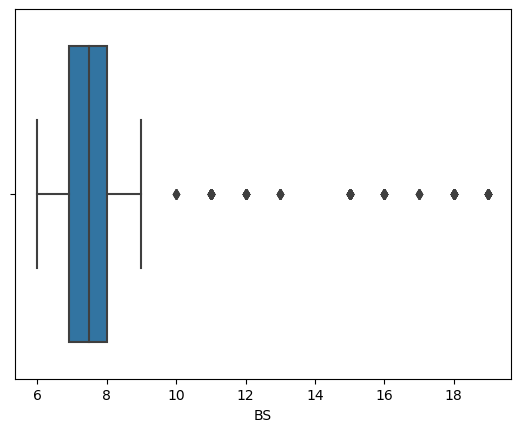

In [90]:
sns.boxplot(x = df_BS); #Kutu grafiğin (bıyıkların) sağında ve solunda görülen noktalar aykırı gözlemdir

In [91]:
Q1 = df_BS.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = df_BS.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [92]:
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 6.9 
Q3= 8.0 
IQR= 1.0999999999999996


In [93]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [94]:
print("Alt Sinir=",alt_sinir,"\nUst Sinir=",ust_sinir)

Alt Sinir= 5.250000000000001 
Ust Sinir= 9.649999999999999


In [95]:
aykiri_tf = (df_BS < alt_sinir) | (df_BS > ust_sinir)

In [96]:
df_BS[aykiri_tf].index

Index([ 205,  974,  641,  437,  449,  458,  986,  237,  465,    7,
       ...
        262,  554,  373,  603,  961,  166, 1011,  968,  362,  583],
      dtype='int64', length=196)

In [97]:
df_BS[aykiri_tf]

205     10.0
974     10.0
641     10.0
437     10.0
449     11.0
        ... 
166     19.0
1011    19.0
968     19.0
362     19.0
583     19.0
Name: BS, Length: 196, dtype: float64

In [98]:
alt_aykiri=(df_BS < alt_sinir)

In [99]:
df_BS[alt_aykiri]

Series([], Name: BS, dtype: float64)

In [100]:
df_BS[alt_aykiri] =int( alt_sinir)

In [101]:
df_BS[alt_aykiri]

Series([], Name: BS, dtype: float64)

In [102]:
aykiri_indeksler_alt = df_BS[alt_aykiri].index

In [103]:
df.loc[aykiri_indeksler_alt, "BS"] = df_BS[alt_aykiri]

In [104]:
ust_aykiri=(df_BS > ust_sinir)

In [105]:
df_BS[ust_aykiri]

205     10.0
974     10.0
641     10.0
437     10.0
449     11.0
        ... 
166     19.0
1011    19.0
968     19.0
362     19.0
583     19.0
Name: BS, Length: 196, dtype: float64

In [106]:
df_BS[ust_aykiri] =int(ust_sinir)

In [107]:
df_BS[ust_aykiri]

205     9.0
974     9.0
641     9.0
437     9.0
449     9.0
       ... 
166     9.0
1011    9.0
968     9.0
362     9.0
583     9.0
Name: BS, Length: 196, dtype: float64

In [108]:
aykiri_indeksler_ust =df_BS[ust_aykiri].index

In [109]:
df.loc[aykiri_indeksler_ust, "BS"] = df_BS[ust_aykiri]

In [110]:
#BodyTemp

In [111]:
df_BodyTemp = df2["BodyTemp"]

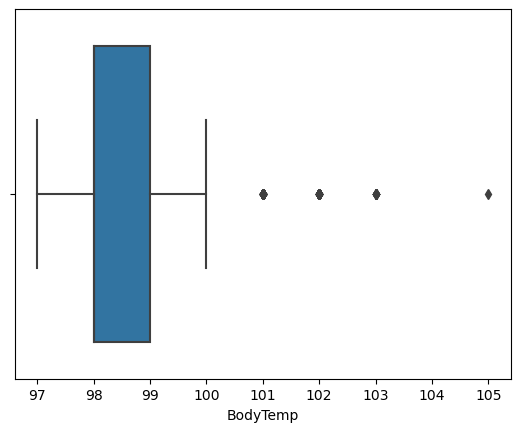

In [112]:
sns.boxplot(x = df_BodyTemp); #Kutu grafiğin (bıyıkların) sağında ve solunda görülen noktalar aykırı gözlemdir

In [113]:
Q1 = df_BodyTemp.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = df_BodyTemp.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [114]:
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 98.0 
Q3= 99.0 
IQR= 1.0


In [115]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [116]:
print("Alt Sinir=",alt_sinir,"\nUst Sinir=",ust_sinir)

Alt Sinir= 96.5 
Ust Sinir= 100.5


In [117]:
aykiri_tf = (df_BodyTemp < alt_sinir) | (df_BodyTemp > ust_sinir)

In [118]:
df_BodyTemp[aykiri_tf].index

Index([  18,   35,   66,   69,   70,   92,   94,  105,  111,  116,
       ...
        987,  988,  989,  990,  992,  996, 1000, 1005, 1006, 1013],
      dtype='int64', length=173)

In [119]:
df_BodyTemp[aykiri_tf]

18      101.0
35      102.0
66      102.0
69      101.0
70      101.0
        ...  
996     102.0
1000    102.0
1005    103.0
1006    102.0
1013    101.0
Name: BodyTemp, Length: 173, dtype: float64

In [120]:
alt_aykiri=(df_BodyTemp < alt_sinir)

In [121]:
df_BodyTemp[alt_aykiri]

Series([], Name: BodyTemp, dtype: float64)

In [122]:
df_BodyTemp[alt_aykiri] = int(alt_sinir)

In [123]:
df_BodyTemp[alt_aykiri]

Series([], Name: BodyTemp, dtype: float64)

In [124]:
aykiri_indeksler_alt = df_BodyTemp[alt_aykiri].index

In [125]:
df.loc[aykiri_indeksler_alt, "BodyTemp"] = df_BodyTemp[alt_aykiri]

In [126]:
ust_aykiri=(df_BodyTemp > ust_sinir)

In [127]:
df_BodyTemp[ust_aykiri]

18      101.0
35      102.0
66      102.0
69      101.0
70      101.0
        ...  
996     102.0
1000    102.0
1005    103.0
1006    102.0
1013    101.0
Name: BodyTemp, Length: 173, dtype: float64

In [128]:
df_BodyTemp[ust_aykiri] = int(ust_sinir)

C:\Users\iirem\AppData\Local\Temp\ipykernel_18548\3899532468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BodyTemp[ust_aykiri] = int(ust_sinir)


In [129]:
df_BodyTemp[ust_aykiri]

18      100.0
35      100.0
66      100.0
69      100.0
70      100.0
        ...  
996     100.0
1000    100.0
1005    100.0
1006    100.0
1013    100.0
Name: BodyTemp, Length: 173, dtype: float64

In [130]:
aykiri_indeksler_ust =df_BodyTemp[ust_aykiri].index

In [131]:
df.loc[aykiri_indeksler_ust, "BodyTemp"] =df_BodyTemp[ust_aykiri]

In [132]:
#HeartRate

In [133]:
df_HeartRate = df2["HeartRate"]

In [134]:
df_HeartRate = df_HeartRate.sort_values()

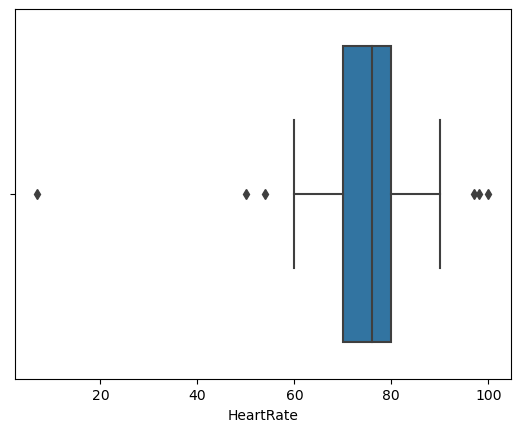

In [135]:
sns.boxplot(x =df_HeartRate); #Kutu grafiğin (bıyıkların) sağında ve solunda görülen noktalar aykırı gözlemdir

In [136]:
Q1 = df_HeartRate.quantile(0.25) #Veri setinin %25'lik indeksine karşılık gelen değer
Q3 = df_HeartRate.quantile(0.75) #Veri setinin %75'lik indeksine karşılık gelen değer
IQR = Q3-Q1 #Çeyrekler açıklığı

In [137]:
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 70.0 
Q3= 80.0 
IQR= 10.0


In [138]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [139]:
print("Alt Sinir=",alt_sinir,"\nUst Sinir=",ust_sinir)

Alt Sinir= 55.0 
Ust Sinir= 95.0


In [140]:
aykiri_tf = (df_HeartRate < alt_sinir) | (df_HeartRate > ust_sinir)

In [141]:
df_HeartRate[aykiri_tf].index

Index([499, 135, 594, 506, 354, 102], dtype='int64')

In [142]:
df_HeartRate[aykiri_tf]

499      7.0
135     50.0
594     54.0
506     97.0
354     98.0
102    100.0
Name: HeartRate, dtype: float64

In [143]:
alt_aykiri=(df_HeartRate < alt_sinir)

In [144]:
df_HeartRate[alt_aykiri]

499     7.0
135    50.0
594    54.0
Name: HeartRate, dtype: float64

In [145]:
df_HeartRate[alt_aykiri] = int(alt_sinir)

In [146]:
df_HeartRate[alt_aykiri]

499    55.0
135    55.0
594    55.0
Name: HeartRate, dtype: float64

In [147]:
aykiri_indeksler_alt = df_HeartRate[alt_aykiri].index

In [148]:
df.loc[aykiri_indeksler_alt, "HeartRate"] = df_HeartRate[alt_aykiri]

In [149]:
ust_aykiri=(df_HeartRate > ust_sinir)

In [150]:
df_HeartRate[ust_aykiri]

506     97.0
354     98.0
102    100.0
Name: HeartRate, dtype: float64

In [151]:
df_HeartRate[ust_aykiri] = int(ust_sinir)

In [152]:
df_HeartRate[ust_aykiri]

506    95.0
354    95.0
102    95.0
Name: HeartRate, dtype: float64

In [153]:
aykiri_indeksler_ust =df_HeartRate[ust_aykiri].index

In [154]:
df.loc[aykiri_indeksler_ust, "HeartRate"] =df_HeartRate[ust_aykiri]

**Eksik değer analizi**

In [155]:
df.notnull().sum()

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS              966
BodyTemp       1014
HeartRate       971
RiskLevel      1014
dtype: int64

In [156]:
df.isnull().sum()# değişkenlerdeki eksik değerlere erişim.

Age             0
SystolicBP      0
DiastolicBP     0
BS             48
BodyTemp        0
HeartRate      43
RiskLevel       0
dtype: int64

In [157]:
df.isnull().sum().sum()#veri setindeki toplam eksik değer sayısı

91

In [158]:
df[df.isnull().all(axis = 1)] #tüm değerleri eksik olan

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [159]:
df[df['BS'].isnull()].head(10)[['BS', 'RiskLevel']]

,BS,RiskLevel
6,NaN,mid risk
12,NaN,low risk
15,NaN,low risk
24,NaN,low risk
26,NaN,low risk
32,NaN,low risk
37,NaN,low risk
50,NaN,low risk
61,NaN,low risk
68,NaN,mid risk


In [160]:
df['BS'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1009    False
1010    False
1011    False
1012     True
1013    False
Name: BS, Length: 1014, dtype: bool

In [161]:
df.groupby("RiskLevel")["BS"].mean()

RiskLevel
high risk    8.615096
mid risk     7.363230
low risk     7.206554
Name: BS, dtype: float64

In [162]:
df["BS"] = df["BS"].fillna(df.groupby("RiskLevel")["BS"].transform("mean"))
#BS değişkenindeki eksik verileri RiskLevel kategorik değişkenlerindeki sınıflara göre ortalamalar ile doldur

In [163]:
df["BS"] = df["BS"].astype(int)

In [164]:
df[df['HeartRate'].isnull()].head(10)[['HeartRate', 'RiskLevel']]

,HeartRate,RiskLevel
0,NaN,high risk
19,NaN,low risk
24,NaN,low risk
38,NaN,low risk
54,NaN,low risk
65,NaN,mid risk
95,NaN,mid risk
112,NaN,high risk
123,NaN,high risk
160,NaN,low risk


In [165]:
df.groupby("RiskLevel")["HeartRate"].mean()

RiskLevel
high risk    76.784091
mid risk     74.121495
low risk     72.906736
Name: HeartRate, dtype: float64

In [166]:
df["HeartRate"] = df["HeartRate"].fillna(df.groupby("RiskLevel")["HeartRate"].transform("mean"))
#HeartRate değişkenindeki eksik verileri RiskLevel kategorik değişkenlerindeki sınıflara göre ortalamalar ile doldur

In [167]:
df["HeartRate"] = df["HeartRate"].astype(int)

In [168]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98.0,76,high risk
1,35,140,90,9,100.0,70,high risk
2,29,90,70,8,98.0,80,high risk
3,30,140,127,7,98.0,70,high risk
4,35,120,60,6,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,9,98.0,80,high risk
1010,55,120,90,9,98.0,60,high risk
1011,35,85,60,9,98.0,86,high risk
1012,43,120,90,8,98.0,76,high risk


In [169]:
excel_filename = 'güncel_veriSeti.xlsx'
df.to_excel(excel_filename, index=False)